<a href="https://colab.research.google.com/github/saikiran2508/Plant_Disease_Detection/blob/master/PDD_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D,Activation,LeakyReLU,BatchNormalization,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K


from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [ ]:
import pickle
import cv2
import os
from os import listdir
from sklearn.preprocessing import LabelBinarizer,MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download vipoooool/new-plant-diseases-dataset

100% 2.69G/2.70G [00:14<00:00, 156MB/s]
100% 2.70G/2.70G [00:14<00:00, 197MB/s]


In [ ]:
! unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
root_dir = r'/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'

os.chdir(root_dir)
listdir()

['valid', 'train']

# New Section

In [ ]:
listdir()

['valid', 'train']

In [ ]:
# # Dimension of resized image
# DEFAULT_IMAGE_SIZE = tuple((256, 256))

# # Number of images used to train the model
# N_IMAGES = 100

# data_dir = os.path.join(root_dir,'train')

# """We use the function `convert_image_to_array` to resize an image to the size `DEFAULT_IMAGE_SIZE` we defined above."""

# def convert_image_to_array(image_dir):
#     try:
#         image = cv2.imread(image_dir)
#         if image is not None:
#             image = cv2.resize(image, DEFAULT_IMAGE_SIZE)
#             return img_to_array(image)
#         else:
#             return np.array([])
#     except Exception as e:
#         print(f"Error : {e}")
#         return None

In [ ]:
# print("Load images from all classes ...")
# plant_disease_folder_list = listdir(data_dir)
# print(len(plant_disease_folder_list))

In [ ]:
import os
x = 0

#walk through Pizza_steak

for dirpath,dirnames,filenames in os.walk("/content/New Plant Diseases Dataset(Augmented)"):
  print(f"There are {len(dirnames)} dir and {len(filenames)} images in '{dirpath}'.")
  x += len(filenames)

There are 1 dir and 0 images in '/content/New Plant Diseases Dataset(Augmented)'.
There are 2 dir and 0 images in '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'.
There are 38 dir and 0 images in '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'.
There are 0 dir and 477 images in '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Common_rust_'.
There are 0 dir and 436 images in '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Septoria_leaf_spot'.
There are 0 dir and 490 images in '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus'.
There are 0 dir and 444 images in '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___Leaf_scorch'.
There are 0 dir and 481 images in '/con

In [ ]:
x

87867

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Normalize
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
test_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

train_data = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode="categorical",seed=42)

test_data = test_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode="categorical",seed=42)

# Build a CNN model

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=15,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(15,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(15,3,activation="relu"),
    tf.keras.layers.Conv2D(15,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(15,3,activation="relu"),
    tf.keras.layers.Conv2D(15,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(15,3,activation="relu"),
    tf.keras.layers.Conv2D(15,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(38,activation="softmax")
])

# Compile
model_1.compile(loss="CategoricalCrossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit
history_1 = model_1.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Epoch 1/20
2197/2197 [==============================] - 241s 108ms/step - loss: 1.4689 - accuracy: 0.5749 - val_loss: 0.9491 - val_accuracy: 0.7202
Epoch 2/20
2197/2197 [==============================] - 241s 110ms/step - loss: 0.5991 - accuracy: 0.8149 - val_loss: 0.5705 - val_accuracy: 0.8243
Epoch 3/20
2197/2197 [==============================] - 232s 105ms/step - loss: 0.4439 - accuracy: 0.8589 - val_loss: 0.4455 - val_accuracy: 0.8603
Epoch 4/20
2197/2197 [==============================] - 234s 107ms/step - loss: 0.3672 - accuracy: 0.8826 - val_loss: 0.3814 - val_accuracy: 0.8821
Epoch 5/20
2197/2197 [==============================] - 234s 107ms/step - loss: 0.3181 - accuracy: 0.8984 - val_loss: 0.6171 - val_accuracy: 0.8169
Epoch 6/20
2197/2197 [==============================] - 234s 107ms/step - loss: 0.2799 - accuracy: 0.9091 - val_loss: 0.3692 - val_accuracy: 0.8840
Epoch 7/20
2197/2197 [==

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

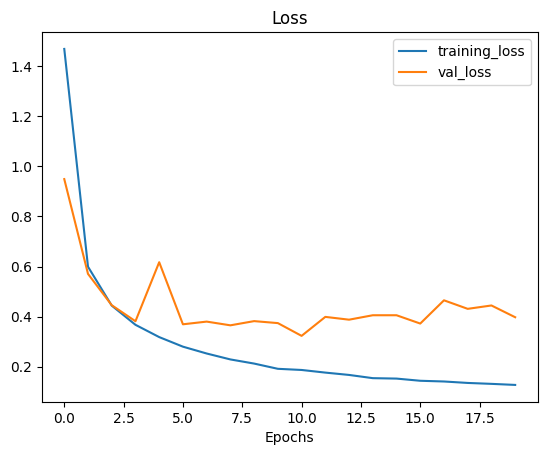

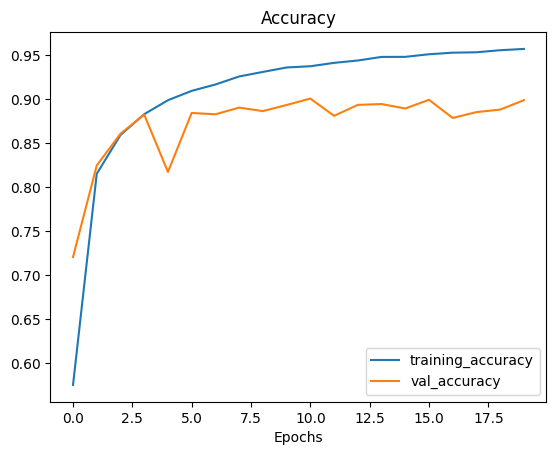

In [ ]:
# Check out the loss curves of model_1
plot_loss_curves(history_1)

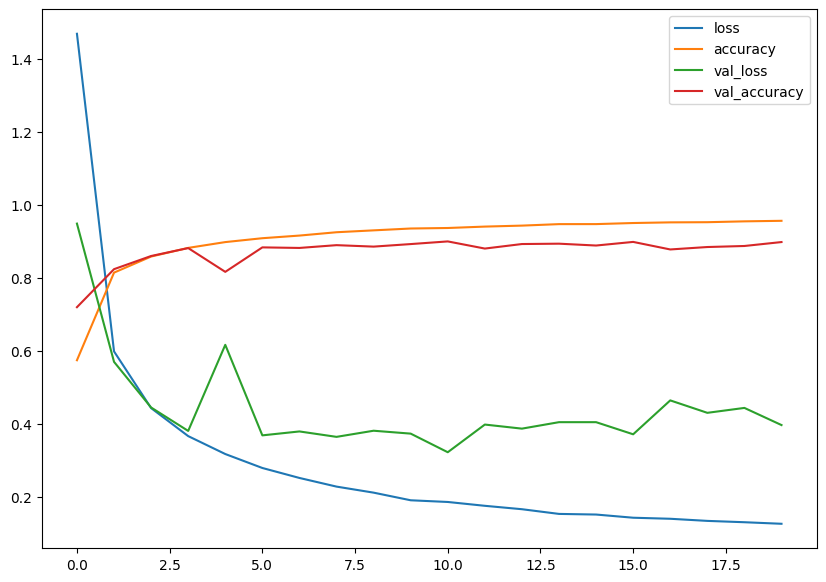

In [ ]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 15)      420       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 15)      2040      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 15)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 15)      2040      
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 15)      2040      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 15)       0         
 2D)                                                  

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['Apple___Apple_scab', 'Apple___Black_rot',
       'Apple___Cedar_apple_rust', 'Apple___healthy',
       'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew',
       'Cherry_(including_sour)___healthy',
       'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
       'Corn_(maize)___Common_rust_',
       'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy',
       'Grape___Black_rot', 'Grape___Esca_(Black_Measles)',
       'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
       'Orange___Haunglongbing_(Citrus_greening)',
       'Peach___Bacterial_spot', 'Peach___healthy',
       'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
       'Potato___Early_blight', 'Potato___Late_blight',
       'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
       'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch',
       'Strawberry___healthy', 'Tomato___Bacterial_spot',
       'Tomato___Early_blight', 'Tomato___Late_blight',
   

In [ ]:
len(class_names)

38

In [ ]:
# Create a function to import and image and reshape it
def load_and_prep_image(filename,img_shape=224):
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img,size=[img_shape,img_shape])
  # Rescale the image
  img=img/255.
  return img

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img,axis=0))
  pred_class = class_names[tf.argmax(pred[0])]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 68ms/step


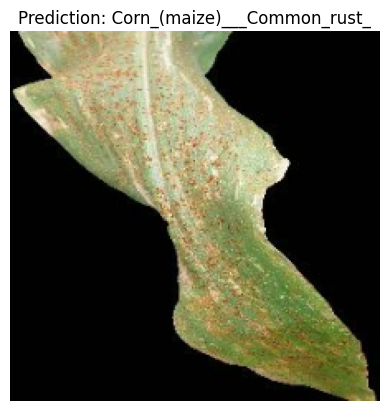

In [ ]:
pred_and_plot(model = model_1,filename="/content/test/test/CornCommonRust3.JPG",class_names=class_names)